In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%run -i 'data_pipeline.py'

In [4]:
ratings_df

,movie,critic_score,audience_score,release_date,audience_tomatometer,critic_tomatometer,score_difference
0,The Invisible Man,91,88,"Feb 28, 2020",Fresh,Fresh,-3
1,The Way Back,83,84,"Mar 6, 2020",Fresh,Fresh,1
2,Never Rarely Sometimes Always,99,72,"Mar 13, 2020",Fresh,Fresh,-27
3,Bad Boys for Life,77,96,"Jan 17, 2020",Fresh,Fresh,19
4,Sonic the Hedgehog,64,93,"Feb 14, 2020",Fresh,Fresh,29
...,...,...,...,...,...,...,...
2406,Eat That Question: Frank Zappa in His Own Words,92,73,"Jun 24, 2016",Fresh,Fresh,-19
2407,Under The Sun,94,69,"Jul 6, 2016",Fresh,Fresh,-25
2408,The Lovers And The Despot,78,53,"Sep 23, 2016",Rotten,Fresh,-25
2409,Transpecos,91,56,"Sep 9, 2016",Rotten,Fresh,-35


Text(0.5, 1.0, 'Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')

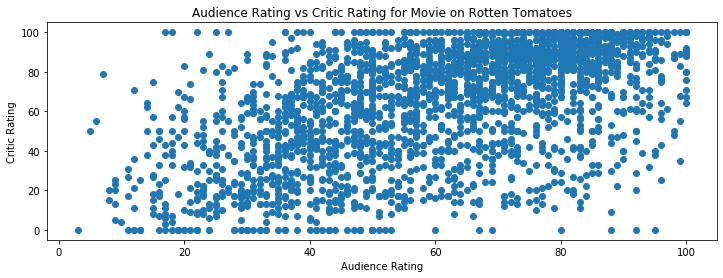

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.scatter(ratings_df['audience_score'],ratings_df['critic_score'])
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')

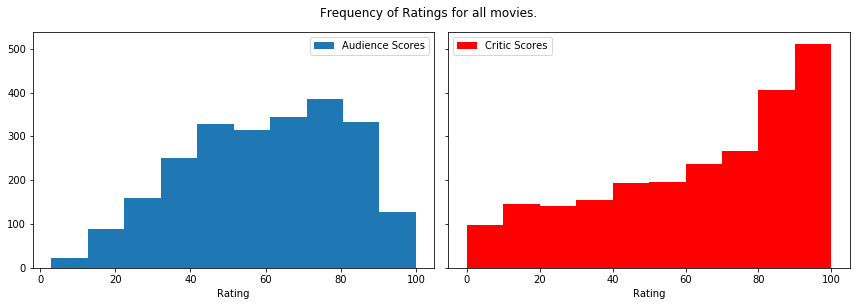

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_score'],bins=10,label="Audience Scores")
ax[1].hist(ratings_df['critic_score'],bins=10,label="Critic Scores",color='r')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('Rating')

plt.suptitle('Frequency of Ratings for all movies.',x= 0.5,y=1.05)
plt.tight_layout()

Text(0.5, 1.05, 'Count of Fresh and Rotten Ratings for Audience and Critics')

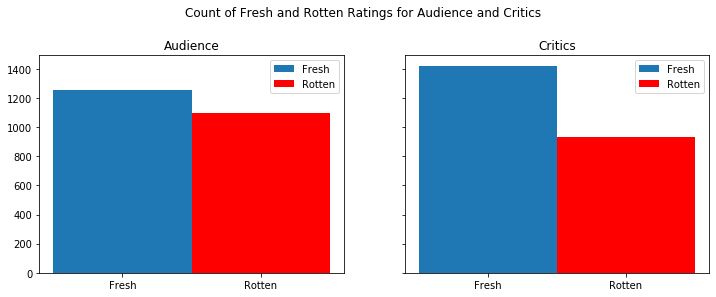

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[0].legend()
ax[0].set_title('Audience')

ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[1].legend()
ax[1].set_title('Critics')

plt.suptitle('Count of Fresh and Rotten Ratings for Audience and Critics',x=0.5,y=1.05)

In [7]:
avg_rating = pd.DataFrame()
avg_rating_idx=['Critics','Audience']
avg_rating['Group']=avg_rating_idx
avg_rating['Average_Rating']= ratings_df['critic_score'].aggregate('average'),ratings_df['audience_score'].aggregate('average')
avg_rating

,Group,Average_Rating
0,Critics,63.244690
1,Audience,59.895072


Text(0.5, 1.0, 'Histogram of differences between Audience and Crititc Score for each movie')

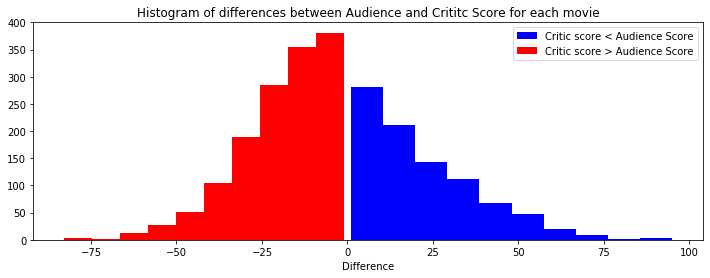

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']>0],color='b',label=('Critic score < Audience Score'))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']<0],color='r',label=('Critic score > Audience Score'))
ax.set_xlabel('Difference')
ax.legend()
ax.set_title("Histogram of differences between Audience and Crititc Score for each movie")

In [9]:
diff_count = pd.DataFrame()
groupings=['Critic Score > Audience Score','Critic Score = Audience Score','Critic Score < Audience Score']
diff_count['Group']=groupings
diff_count['Count']= ratings_df['score_difference'][ratings_df['score_difference']<0].count(),ratings_df['score_difference'][ratings_df['score_difference']==0].count(),ratings_df['score_difference'][ratings_df['score_difference']>0].count()
diff_count

,Group,Count
0,Critic Score > Audience Score,1410
1,Critic Score = Audience Score,50
2,Critic Score < Audience Score,894


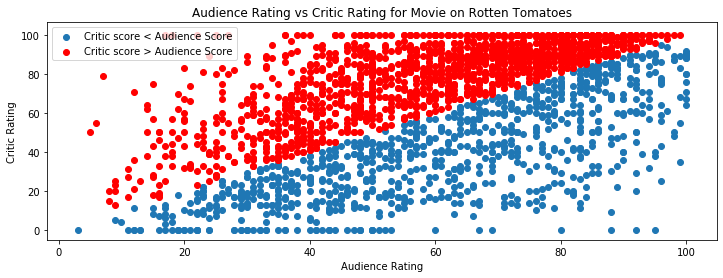

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.scatter(ratings_df['audience_score'][ratings_df['score_difference']>0],ratings_df['critic_score'][ratings_df['score_difference']>0],label='Critic score < Audience Score')
ax.scatter(ratings_df['audience_score'][ratings_df['score_difference']<0],ratings_df['critic_score'][ratings_df['score_difference']<0],color='r',label='Critic score > Audience Score')
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')
ax.legend()